In [1]:
import matplotlib.pyplot as plt
import scipy as sc
import neurokit2 as nk
from scipy.signal import decimate 

import numpy as np
import pandas as pd

import os

In [2]:
#1.data path

In [3]:
home_path = "C:\\sebin\\ecg"
git_path = home_path+"\\ecg_data_wfdb"

file_path = home_path+"\\data\\lab\\ecg.txt"
output_path = home_path+"\\save\\lab_data"


In [4]:
#2.data open

In [5]:
data = []

In [6]:
with open(file_path,'r') as f:
    cnt = 0

    f.readline()
    date_time = f.readline()

    while(True):
        line = f.readline()
        if  line == '':
            break
        data.extend(line.rstrip().split("  "))
        cnt+=1


In [7]:
n = len(data)
for i in range(n):
    data[i] = float(data[i])

In [8]:
# +check data

In [9]:
resampling = 28
print(n)

699548


In [10]:
re_n = n//28
print(re_n)

24983


In [11]:
#3. resampling

In [12]:
re_data = []
for i in range(re_n):
    re_data.append(data[i*resampling])

In [13]:
# + index

In [14]:
index = 5

In [15]:
#4. plot(default,downsampling)

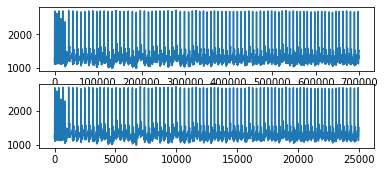

In [16]:
plt.subplot(3,1,1)
plt.plot(data)

plt.subplot(3,1,2)
plt.plot(re_data)

In [17]:
#5.  get peak and peak y_value

In [18]:
peak = nk.ecg.ecg_findpeaks(re_data, sampling_rate=360, method='neurokit')
peak = np.array(peak['ECG_R_Peaks'])

In [19]:
peak_y = np.zeros(re_n)
for i in peak:
    peak_y[i] = re_data[i]

In [20]:
#6. peak plot

In [21]:
re_n = range(re_n)

(1000.0, 2849.765625)

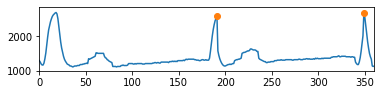

In [22]:

plt.subplot(3,1,3)
plt.plot(re_n,re_data,re_n,peak_y,"o")
plt.xlim((0,360))
plt.ylim(1000)


In [23]:
#7. segment make


In [24]:
#빠른방법인데 오류 
'''
seg =  np.zeros([peak.size,288])
flag = -1
for i in range(peak.size):
    if (peak[i]-144 >= 0) or (peak[i]+144 < peak[-1]) :
        r = peak[i]
        seg[flag][144] = re_data[r]
        flag += 1
        for j in range(144):
            seg[flag][144-j] = re_data[i-j]
            seg[flag][144+j] = re_data[i+j]
'''
            
            

'\nseg =  np.zeros([peak.size,288])\nflag = -1\nfor i in range(peak.size):\n    if (peak[i]-144 >= 0) or (peak[i]+144 < peak[-1]) :\n        r = peak[i]\n        seg[flag][144] = re_data[r]\n        flag += 1\n        for j in range(144):\n            seg[flag][144-j] = re_data[i-j]\n            seg[flag][144+j] = re_data[i+j]\n'

In [25]:
seg = []
size = peak.size
for i in range(size):
    r = peak[i]

    sepfrom = r-144
    septo = r+144

    if sepfrom <= 0:
        continue
    if septo >= peak[-1]:
        break

    seg.append(re_data[sepfrom:septo])

In [26]:
# ※p파가 초반에만 보이고 안보임

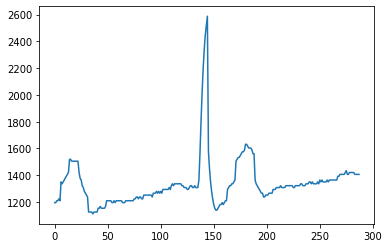

In [27]:
plt.plot(seg[0])

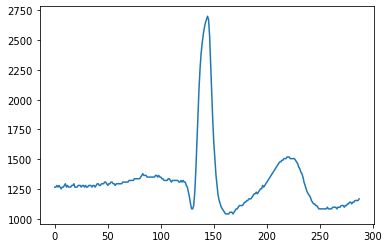

In [28]:
plt.plot(seg[30])

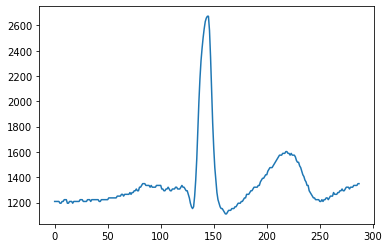

In [30]:
plt.plot(seg[70])

In [ ]:
df = pd.DataFrame(seg)

In [ ]:
df=df.round(2)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,1195.31,1195.31,1209.38,1209.38,1223.44,1209.38,1350.00,1335.94,1350.00,1364.06,...,1420.31,1420.31,1420.31,1420.31,1420.31,1406.25,1406.25,1406.25,1406.25,1406.25
1,1195.31,1181.25,1195.31,1209.38,1209.38,1293.75,1307.81,1321.88,1321.88,1335.94,...,1420.31,1420.31,1434.37,1448.44,1448.44,1420.31,1420.31,1420.31,1406.25,1420.31
2,1251.56,1279.69,1279.69,1279.69,1293.75,1476.56,1476.56,1490.62,1504.69,1504.69,...,1378.13,1392.19,1378.13,1378.13,1378.13,1378.13,1434.37,1420.31,1406.25,1406.25
3,1378.13,1378.13,1392.19,1406.25,1420.31,1420.31,1420.31,1434.37,1532.81,1532.81,...,1335.94,1335.94,1321.88,1321.88,1335.94,1335.94,1350.00,1350.00,1364.06,1335.94
4,1434.37,1448.44,1448.44,1462.50,1476.56,1532.81,1518.75,1518.75,1518.75,1518.75,...,1195.31,1195.31,1181.25,1195.31,1195.31,1209.38,1209.38,1209.38,1209.38,1195.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1321.88,1321.88,1335.94,1335.94,1335.94,1335.94,1350.00,1364.06,1350.00,1350.00,...,1237.50,1237.50,1251.56,1265.62,1251.56,1265.62,1265.62,1265.62,1265.62,1279.69
77,1279.69,1293.75,1293.75,1307.81,1279.69,1279.69,1293.75,1293.75,1307.81,1307.81,...,1195.31,1195.31,1195.31,1195.31,1195.31,1195.31,1209.38,1223.44,1223.44,1209.38
78,1265.62,1265.62,1279.69,1279.69,1279.69,1265.62,1265.62,1279.69,1279.69,1279.69,...,1223.44,1223.44,1223.44,1237.50,1223.44,1237.50,1237.50,1237.50,1237.50,1237.50
79,1279.69,1279.69,1279.69,1293.75,1293.75,1279.69,1279.69,1279.69,1279.69,1293.75,...,1195.31,1209.38,1209.38,1209.38,1209.38,1209.38,1223.44,1223.44,1237.50,1237.50


In [ ]:
#8. save segment
def output_segment(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)
        for i in range(len(df.index)):
            data = pd.DataFrame(df.iloc[i])
            p = dir+"\\"+str(i)+".csv"
            data.to_csv(p,header=False,index=False)



In [ ]:
output_segment(output_path+"\\no_p")

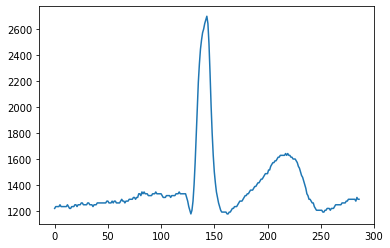

In [37]:
plt.plot(pd.read_csv(output_path+"\\no_p"+"\\51.csv"))